In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import subprocess
import matplotlib.pyplot as plt
import glob, os
import math
import random
from subprocess import Popen, PIPE

In [14]:
executablePath = './../codigo/build/ContarPalabras'
os.chdir("./")
datasets = os.listdir("./data/")
datasets = datasets[:1]
print(datasets)

print ("Ejecutando tests")

for dataset in datasets:
	#create output file
	results = './results/%s.csv' %(dataset)
	outputFile = open(results, 'w+')
	outputFile.write("cantThreads,time,algorithm\n")

	args = ""
	for file in os.listdir("./data/" + dataset):
		args += " ./data/" + dataset + "/" + file

	for cantThreads in [1,5,10,15,20,26]:
		command = executablePath + " %s %s %s" % (cantThreads, cantThreads, args)
		p = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
		p.wait()

		print("Finished executing dataset %s with %s amount of threads" % (dataset, cantThreads))
		output=p.stdout.read().decode("utf-8")
		outputFile.write(output)
	
	outputFile.close()

['incremental']
Ejecutando tests
Finished executing dataset incremental with 1 amount of threads
Finished executing dataset incremental with 5 amount of threads
Finished executing dataset incremental with 10 amount of threads
Finished executing dataset incremental with 15 amount of threads
Finished executing dataset incremental with 20 amount of threads
Finished executing dataset incremental with 26 amount of threads


In [22]:
os.chdir("./")
resultsPath="./results/"
results = os.listdir(resultsPath)
print(resultsPath + results[0])

./results/uniforme.csv


    cantThreads     time                 algorithm
0             1   173091   cargarMultiplesArchivos
1             1    39414            maximoParalelo
2             5   228078   cargarMultiplesArchivos
3             5   123050            maximoParalelo
4            10   428312   cargarMultiplesArchivos
5            10   245952            maximoParalelo
6            15   506910   cargarMultiplesArchivos
7            15   361812            maximoParalelo
8            20   588999   cargarMultiplesArchivos
9            20   458670            maximoParalelo
10           26  3589746   cargarMultiplesArchivos
11           26   825369            maximoParalelo


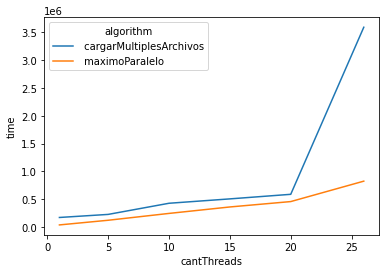

In [18]:
for file in results: 
    df = pd.read_csv(resultsPath + file, header=[0])
    #df['time'] = pd.to_datetime(df['time'], unit='ms')
    print(df)
    ax= sns.lineplot(data=df, x='cantThreads', y='time',hue="algorithm", ci=None)